In [187]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import periodogram #Used in Frequency Feature

# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay,roc_curve, auc,f1_score
from sklearn.model_selection import GridSearchCV,train_test_split # Import train_test_split function


from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier,plot_tree # Import Decision Tree Classifier

import seaborn as sns





In [188]:
def plot2(eeg,channelAnno, eegchannel,sfreq, starttime, endtime):
    #eeg is the eeg dataframe you are using
    #channelanno is the labeled data you are plotting
    # eegchannel is the channel of EEG you wish to plot, for example F4-C4
    # sfreq is the sampling frequency
    # eegtime is the numpy array created that converts the EEG index to seconds, based on the sampling frequency
    # starttime is time in seconds of the start time of the EEG data that you wish to plot
    # endtime is the time in seconds of the end time of the EEG data that you wish to plot 
    leneeg = len(eeg) #Length of eeg file
    eegst=int(sfreq*starttime) # calculate the start eeg index
    eeget=int(sfreq*endtime)# calculate the end eeg index
    eegtime= np.arange(0,leneeg,1)/sfreq 
    fig,ax = plt.subplots(nrows = 1, ncols = 1, figsize=(16,5))
    eeg_trace = ax.plot(eegtime[eegst:eeget+1], eeg.loc[eegst:eeget,eegchannel],color='blue',label='EEG') # Plot EEG Data
    ax.set_ylabel('$\mu V$',color='blue',fontsize=16) # Set left hand yaxis label to 'Cases'.
    ax.set_xlabel('Seconds',color='green',fontsize=16) # Set left hand yaxis label to 'Cases'.
    ax2 = ax.twinx() # Create a second y axis on the right hand side of the plot using the same x axis.
    annotations = ax2.plot(channelAnno.loc[starttime:endtime,eegchannel],color='red',label='Seizure') # Plot Annotation data.
    ax2.set_ylabel('Seizure',color='red',fontsize=16) # Set right hand yaxis label to 'Deaths'.
    ax2.set_ylim(bottom=0) # Limit the right-hand y axis to start at 0.
    ax2.grid() # Plot a grid for the right hand y axis.
    ax2.legend(eeg_trace + annotations, [eegchannel,'Seizure'], fontsize=16, loc='best')
    ax.set_title('EEG and Anotation',fontsize=16) 
    plt.show

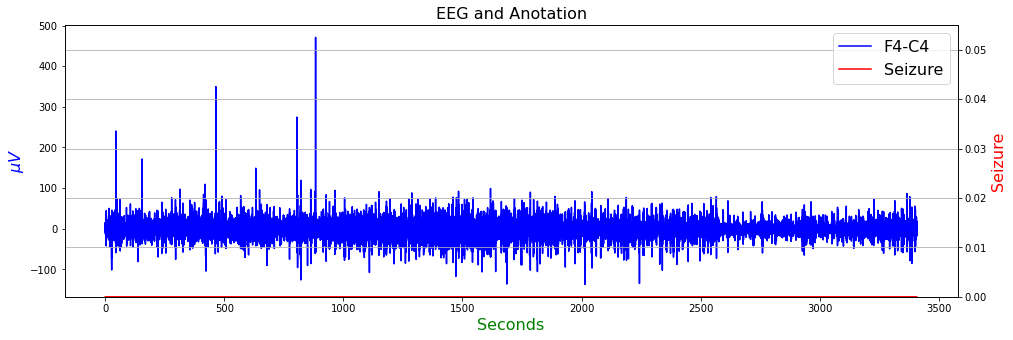

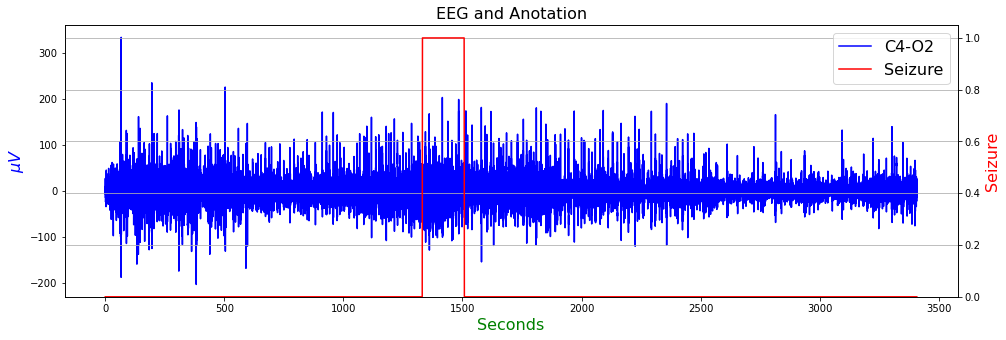

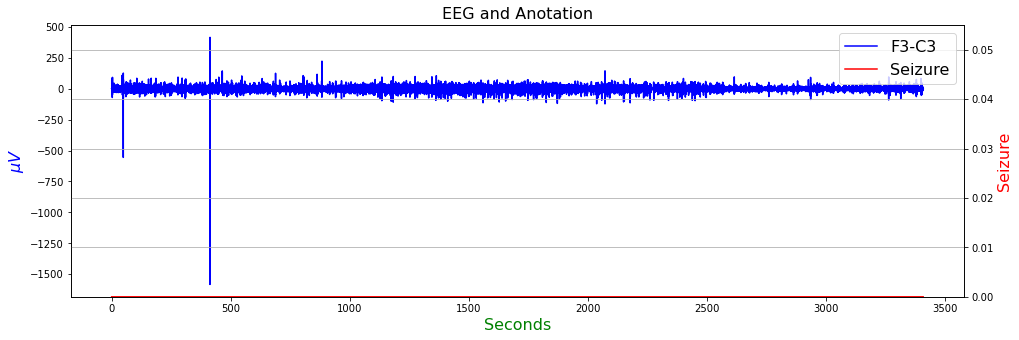

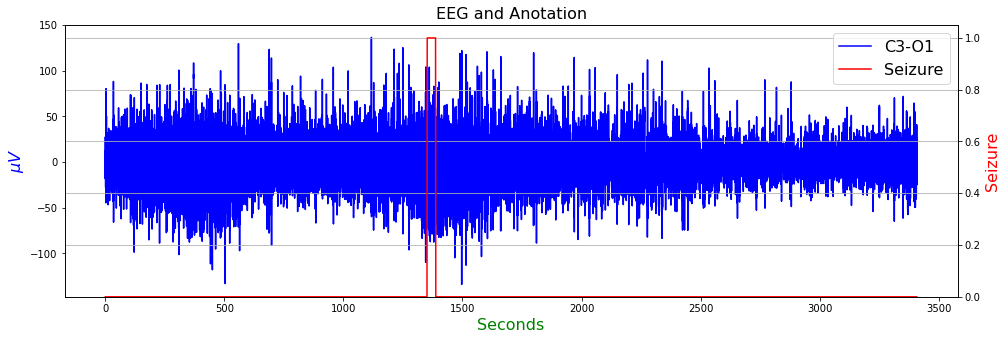

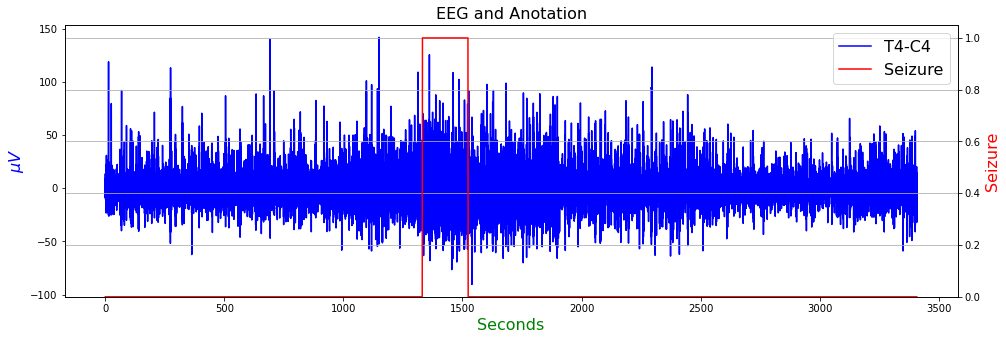

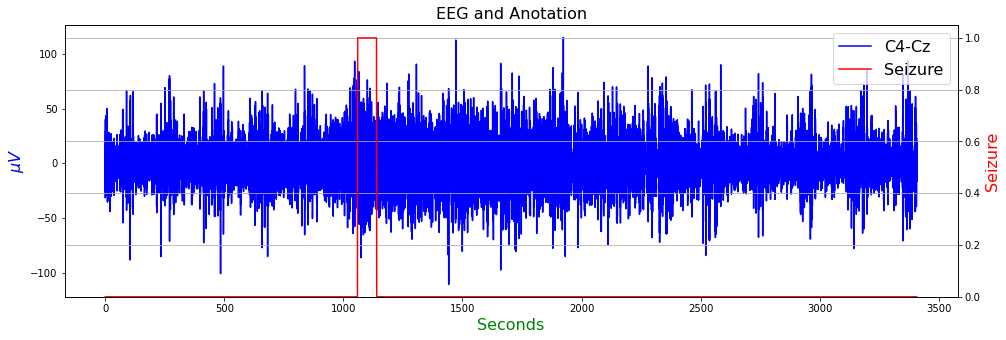

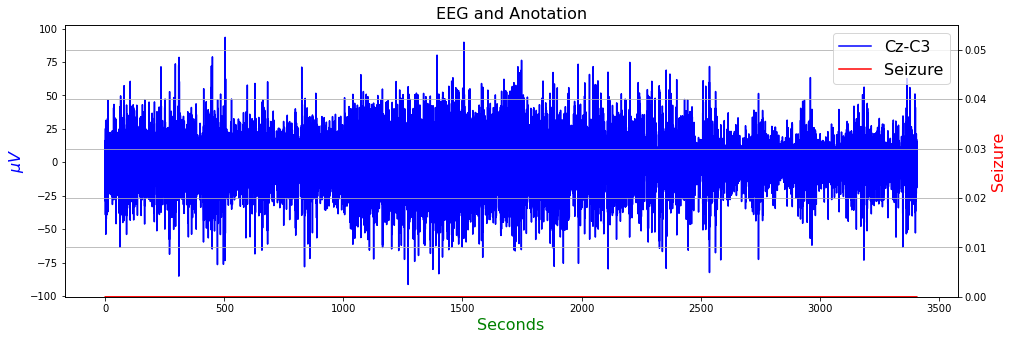

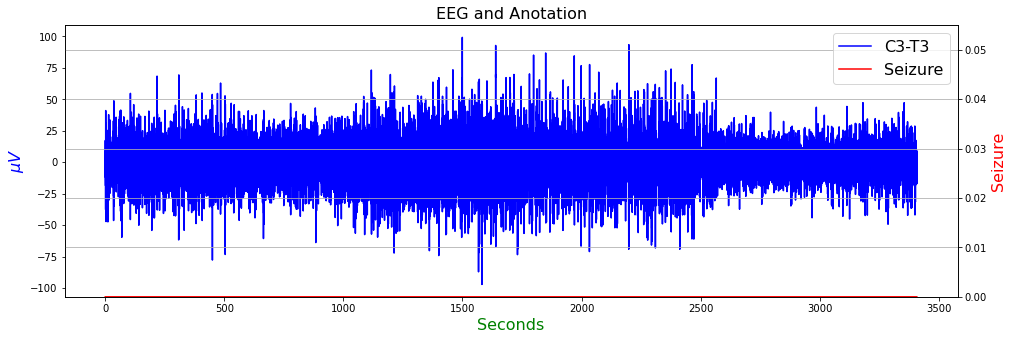

In [190]:
eeg =  pd.read_csv('EEG4_processed.csv')
channelAnno = pd.read_csv('eeg4_Combined_Exper_Annotations.csv').drop("Unnamed: 0",axis = 1)
plot2(eeg, channelAnno,'F4-C4', 32, 0, len(eeg)/32)
plot2(eeg, channelAnno,'C4-O2', 32, 0, len(eeg)/32)
plot2(eeg, channelAnno,'F3-C3', 32, 0, len(eeg)/32)
plot2(eeg, channelAnno,'C3-O1', 32, 0, len(eeg)/32)
plot2(eeg, channelAnno,'T4-C4', 32, 0, len(eeg)/32)
plot2(eeg, channelAnno,'C4-Cz', 32, 0, len(eeg)/32)
plot2(eeg, channelAnno,'Cz-C3', 32, 0, len(eeg)/32)
plot2(eeg, channelAnno,'C3-T3', 32, 0, len(eeg)/32)

# Load in data

In [4]:
eeg1_csv =   pd.read_csv('EEG1_processed.csv')
eeg4_csv =   pd.read_csv('EEG4_processed.csv')
eeg5_csv =   pd.read_csv('EEG5_processed.csv')
eeg7_csv =   pd.read_csv('EEG7_processed.csv')
eeg9_csv =   pd.read_csv('EEG9_processed.csv')
eeg13_csv =   pd.read_csv('EEG13_processed.csv')
eeg14_csv =   pd.read_csv('EEG14_processed.csv')
eeg19_csv =   pd.read_csv('EEG19_processed.csv')
eeg21_csv =   pd.read_csv('EEG21_processed.csv')
eeg31_csv =   pd.read_csv('EEG31_processed.csv')
eeg34_csv =   pd.read_csv('EEG34_processed.csv')
eeg36_csv =   pd.read_csv('EEG36_processed.csv')
eeg38_csv =   pd.read_csv('EEG38_processed.csv')
eeg39_csv =   pd.read_csv('EEG39_processed.csv')
eeg44_csv =   pd.read_csv('EEG44_processed.csv')
eeg47_csv =   pd.read_csv('EEG47_processed.csv')
eeg51_csv =   pd.read_csv('EEG51_processed.csv')

In [5]:
channelAnno_1_csv = pd.read_csv('eeg1_Combined_Exper_Annotations.csv').drop("Unnamed: 0",axis = 1)
channelAnno_4_csv = pd.read_csv('eeg4_Combined_Exper_Annotations.csv').drop("Unnamed: 0",axis = 1)
channelAnno_5_csv = pd.read_csv('eeg5_Combined_Exper_Annotations.csv').drop("Unnamed: 0",axis = 1)
channelAnno_7_csv = pd.read_csv('eeg7_Combined_Exper_Annotations.csv').drop("Unnamed: 0",axis = 1)
channelAnno_9_csv = pd.read_csv('eeg9_Combined_Exper_Annotations.csv').drop("Unnamed: 0",axis = 1)
channelAnno_13_csv = pd.read_csv('eeg13_Combined_Exper_Annotations.csv').drop("Unnamed: 0",axis = 1)
channelAnno_14_csv = pd.read_csv('eeg14_Combined_Exper_Annotations.csv').drop("Unnamed: 0",axis = 1)
channelAnno_19_csv = pd.read_csv('eeg19_Combined_Exper_Annotations.csv').drop("Unnamed: 0",axis = 1)
channelAnno_21_csv = pd.read_csv('eeg21_Combined_Exper_Annotations.csv').drop("Unnamed: 0",axis = 1)
channelAnno_31_csv = pd.read_csv('eeg31_Combined_Exper_Annotations.csv').drop("Unnamed: 0",axis = 1)
channelAnno_34_csv = pd.read_csv('eeg34_Combined_Exper_Annotations.csv').drop("Unnamed: 0",axis = 1)
channelAnno_36_csv = pd.read_csv('eeg36_Combined_Exper_Annotations.csv').drop("Unnamed: 0",axis = 1)
channelAnno_38_csv = pd.read_csv('eeg38_Combined_Exper_Annotations.csv').drop("Unnamed: 0",axis = 1)
channelAnno_39_csv = pd.read_csv('eeg39_Combined_Exper_Annotations.csv').drop("Unnamed: 0",axis = 1)
channelAnno_44_csv = pd.read_csv('eeg44_Combined_Exper_Annotations.csv').drop("Unnamed: 0",axis = 1)
channelAnno_47_csv = pd.read_csv('eeg47_Combined_Exper_Annotations.csv').drop("Unnamed: 0",axis = 1)
channelAnno_51_csv = pd.read_csv('eeg51_Combined_Exper_Annotations.csv').drop("Unnamed: 0",axis = 1)

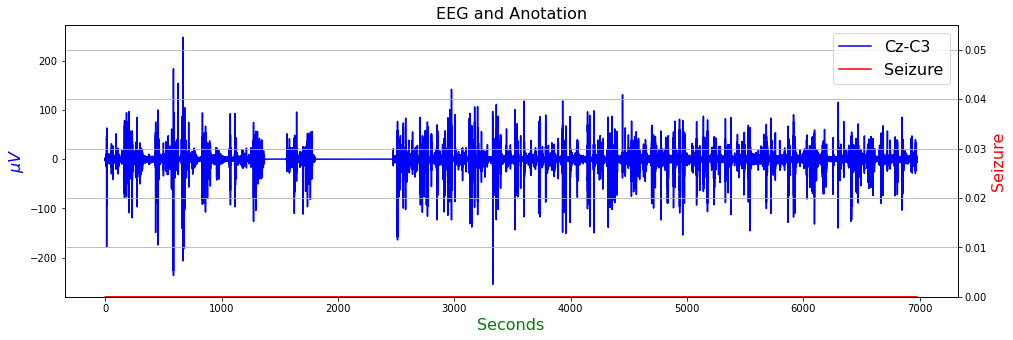

In [6]:
plot2(eeg1_csv,channelAnno_1_csv,'Cz-C3',32, 0, len(eeg1_csv)/32)

In [7]:
dataframes = [eeg1_csv, eeg4_csv, eeg5_csv, eeg7_csv, eeg9_csv, eeg13_csv, eeg14_csv, eeg19_csv, 
              eeg21_csv, eeg31_csv, eeg34_csv, eeg36_csv, eeg38_csv, eeg39_csv, eeg44_csv, 
              eeg47_csv, eeg51_csv]
              
dataframes_labels=[channelAnno_1_csv, channelAnno_4_csv, channelAnno_5_csv, channelAnno_7_csv, channelAnno_9_csv, 
                    channelAnno_13_csv, channelAnno_14_csv, channelAnno_19_csv, channelAnno_21_csv, channelAnno_31_csv, 
                    channelAnno_34_csv, channelAnno_36_csv, channelAnno_38_csv, channelAnno_39_csv, channelAnno_44_csv, 
                    channelAnno_47_csv, channelAnno_51_csv]

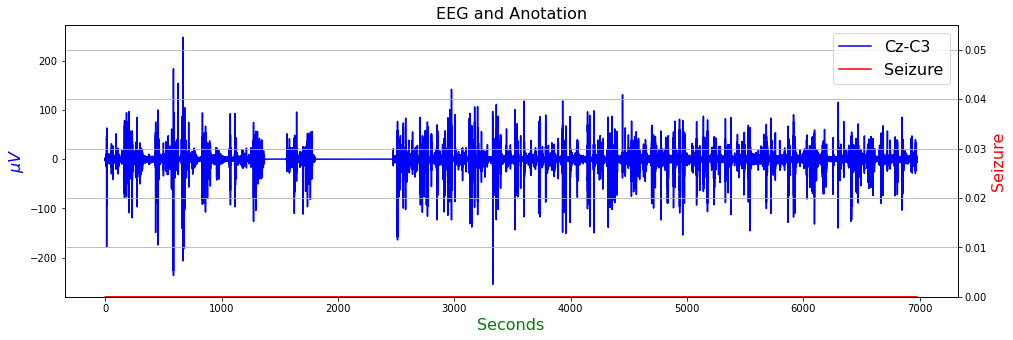

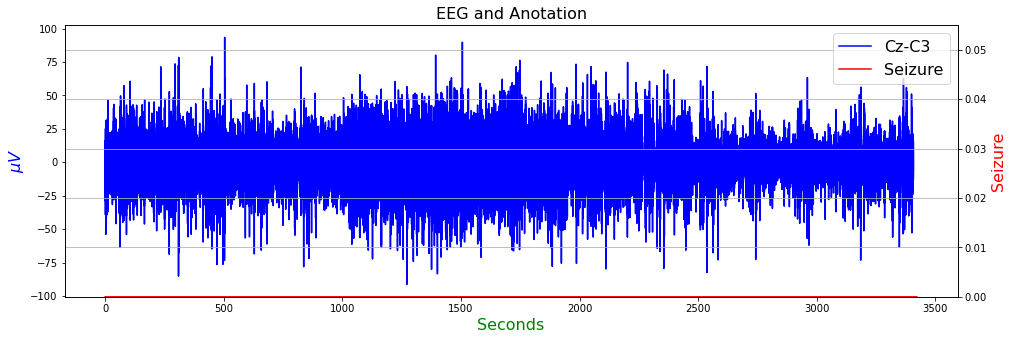

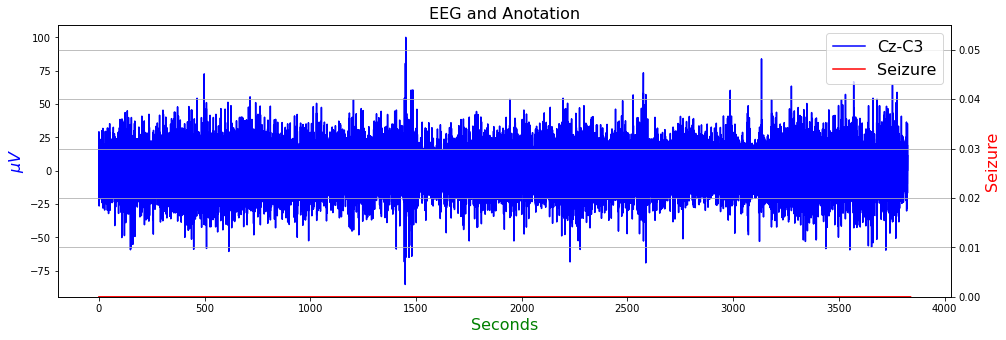

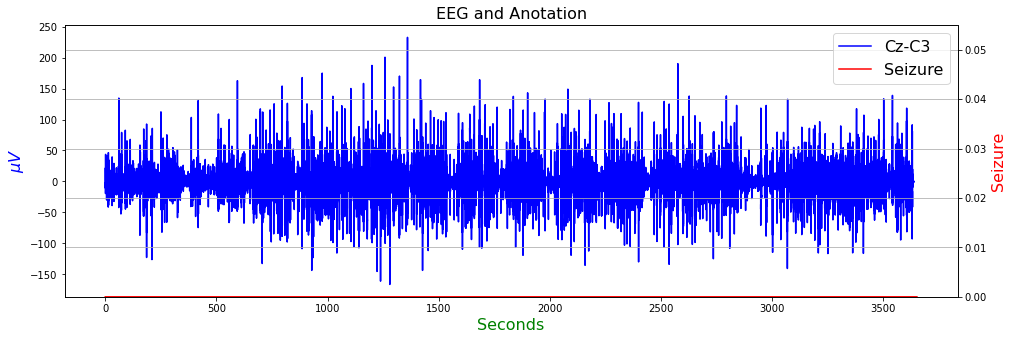

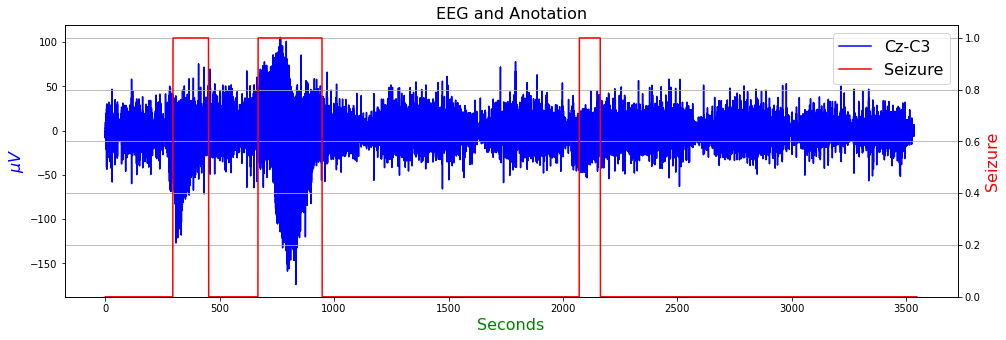

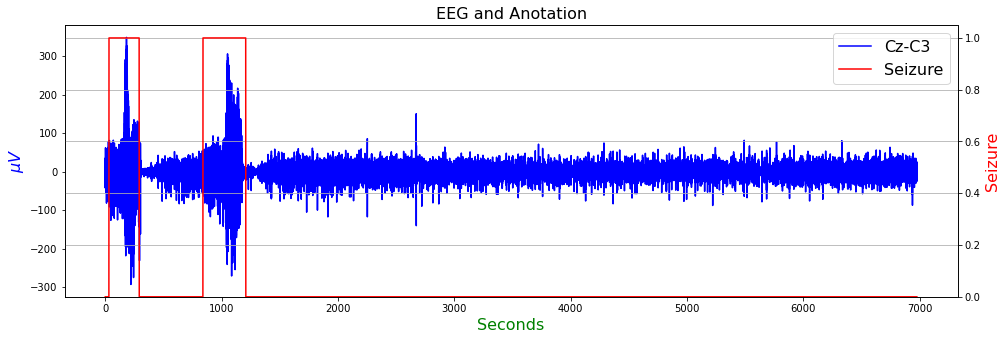

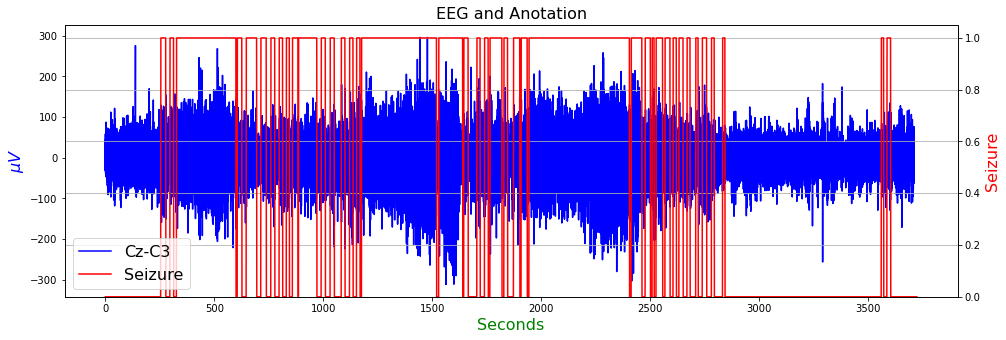

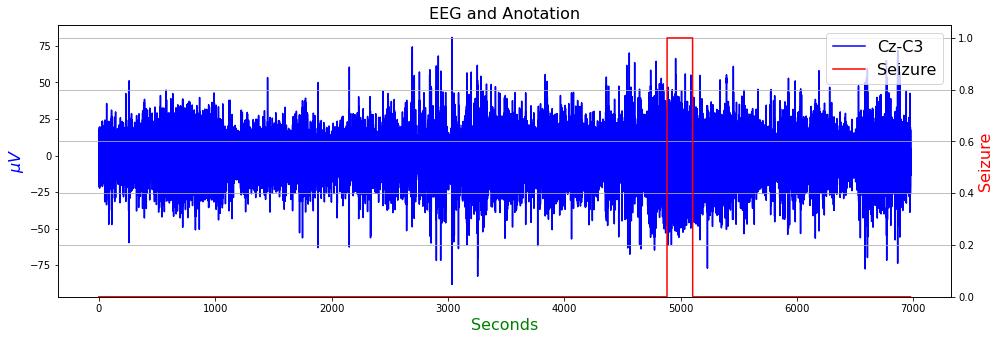

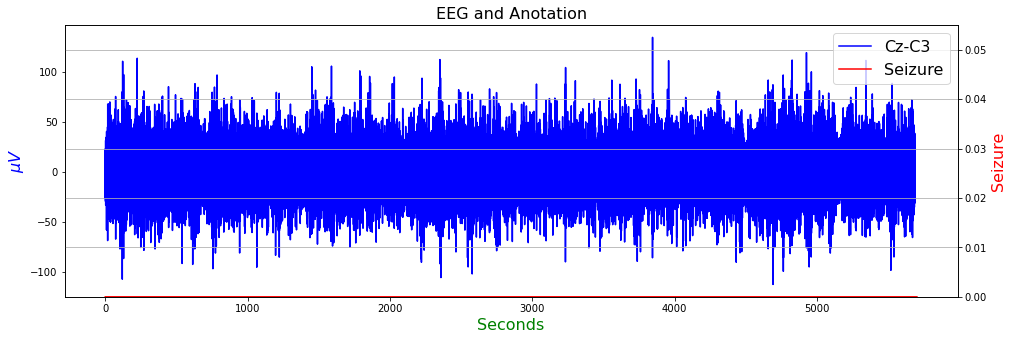

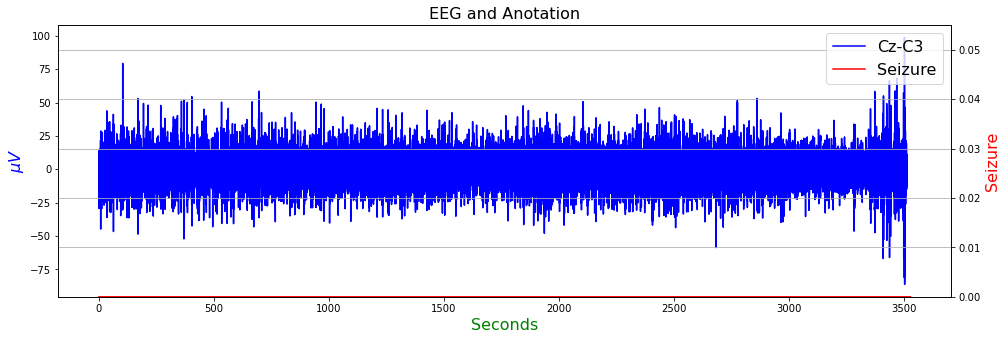

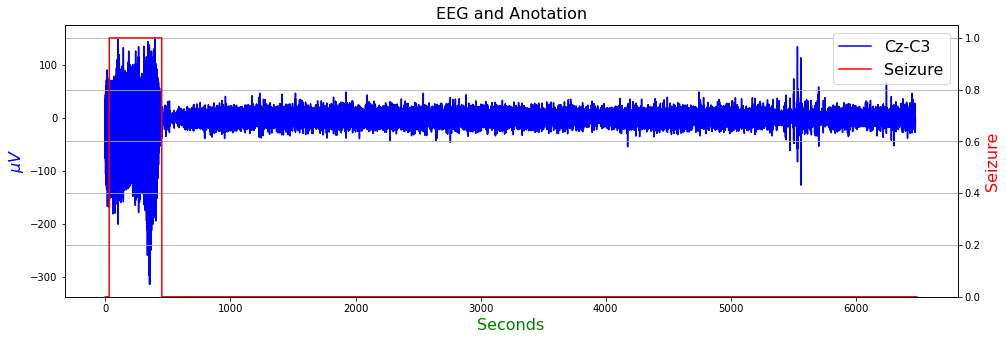

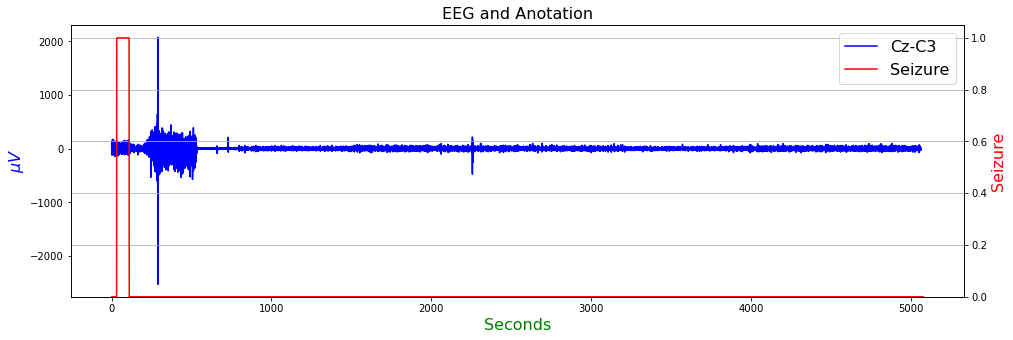

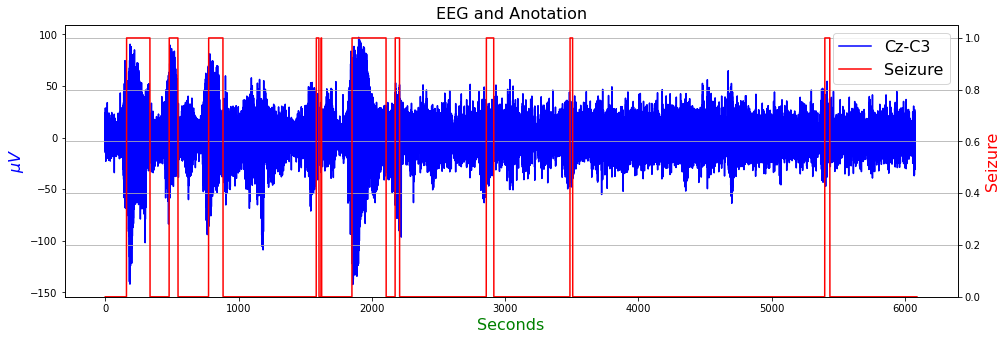

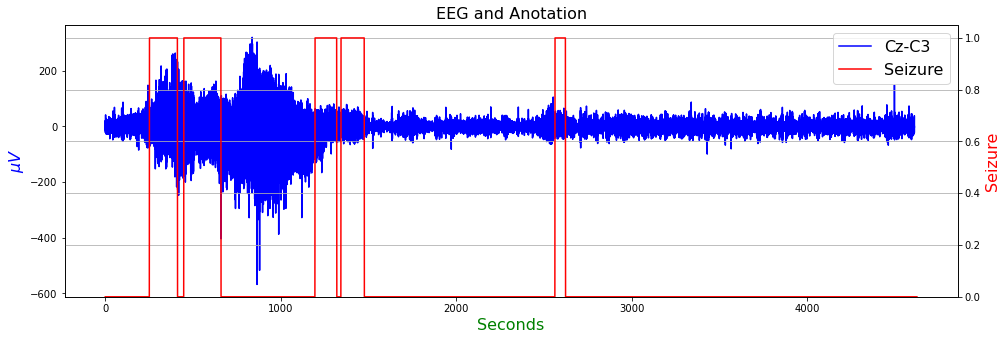

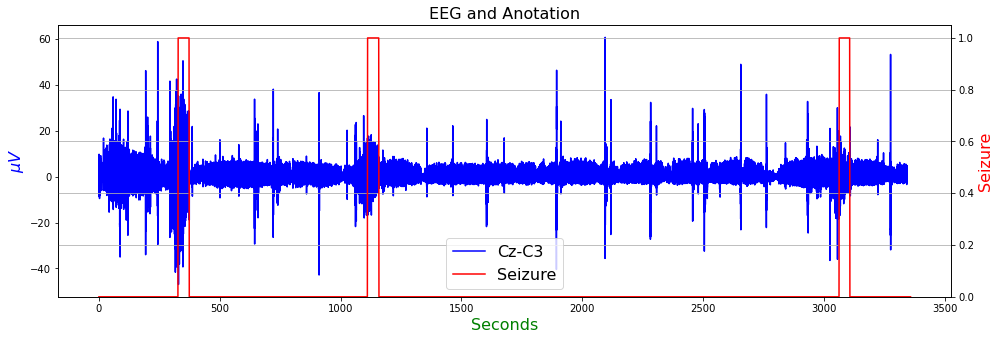

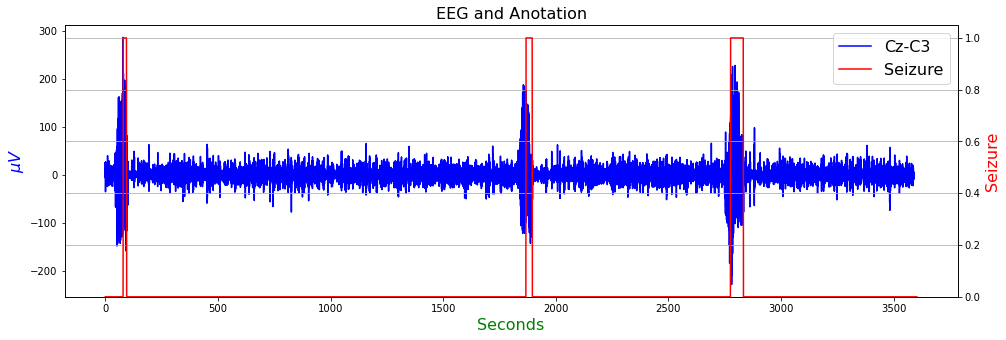

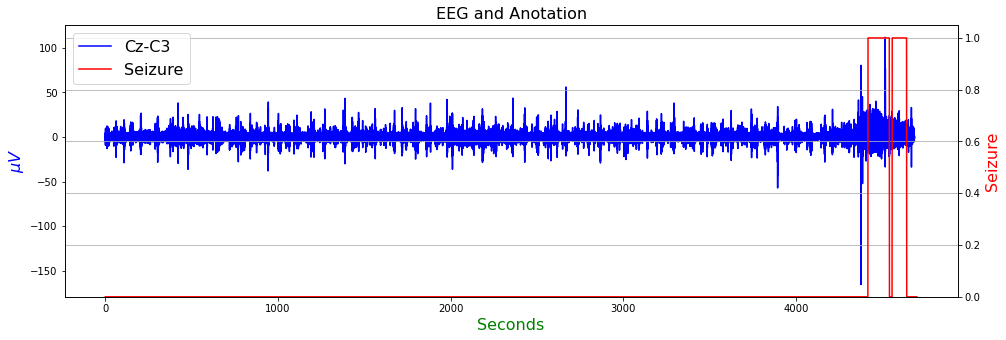

In [8]:
for df,dfl in zip(dataframes,dataframes_labels):
    plot2(df,dfl,'Cz-C3',32, 0, len(eeg1_csv)/32)


It appears eeg1 has 0 values - perhaps sensors were disconnected. Remove this from from data used.

In [9]:
dataframes = [eeg4_csv, eeg5_csv, eeg7_csv, eeg9_csv, eeg13_csv, eeg14_csv, eeg19_csv, 
              eeg21_csv, eeg31_csv, eeg34_csv, eeg36_csv, eeg38_csv, eeg39_csv, eeg44_csv, 
              eeg47_csv, eeg51_csv]
              
dataframes_labels=[channelAnno_4_csv, channelAnno_5_csv, channelAnno_7_csv, channelAnno_9_csv, 
                    channelAnno_13_csv, channelAnno_14_csv, channelAnno_19_csv, channelAnno_21_csv, channelAnno_31_csv, 
                    channelAnno_34_csv, channelAnno_36_csv, channelAnno_38_csv, channelAnno_39_csv, channelAnno_44_csv, 
                    channelAnno_47_csv, channelAnno_51_csv]

In [10]:
eeg_df = pd.concat([df for df in dataframes], ignore_index=True)
eeg_labels = pd.concat([dfl for dfl in dataframes_labels], ignore_index=True)

In [11]:
len(eeg_df), len(eeg_labels)

(2737728, 85792)

In [12]:
eeg_df.loc[(eeg_df==0).any(axis=1)]

,F4-C4,C4-O2,F3-C3,C3-O1,T4-C4,C4-Cz,Cz-C3,C3-T3


In [13]:
eeg_data = pd.melt(eeg_df)


# Perform Analysis on Cz-C3 channel

# Line Length

In [14]:
def LLcalculation(N, epoch):
    LL = sum(np.absolute(epoch[i+1]-epoch[i]) for i in range(N-1))
    return LL

In [15]:
NEpoch = 256
Noverlap=128
numberofEpochs = (len(eeg_df)-NEpoch)//(NEpoch-Noverlap) + 1 # Use integer divison // to get exact number of epochs
numberofEpochs

21387

In [16]:
featuretime= np.arange(1,numberofEpochs+1,1)*4

In [17]:
len(eeg_df)

2737728

In [18]:
epochstart=0
LL_Feature = np.array([])
for i in range(numberofEpochs):
    Epoch= eeg_df.loc[epochstart:epochstart+NEpoch-1,"Cz-C3"].to_numpy()
    epochstart += Noverlap
    LL_Feature=np.append(LL_Feature,LLcalculation(NEpoch, Epoch))

In [19]:
len(LL_Feature)

21387

In [20]:
def plot3(eeg_data, eeg_labels, feature,feature_time, feature_name):
    fig,ax = plt.subplots(nrows = 2, ncols = 1, figsize=(16,10))
    recordingtime= np.arange(0,len(eeg_data),1)/32 
    eeg_trace = ax[0].plot(recordingtime, eeg_data,color='blue') # Plot EEG Data
    ax[0].set_ylabel('$\mu V$',color='blue',fontsize=16) 
    ax[0].set_xlabel('Seconds',color='green',fontsize=16) 
    ax2 = ax[0].twinx() # Create a second y axis on the right hand side of the plot using the same x axis.
    features = ax2.plot(feature_time, feature,color='red',label=feature_name) # Plot Annotation data.
    ax2.set_ylabel(feature_name, fontsize=16, color='red') 
    ax2.set_ylim(bottom=0) # Limit the right-hand y axis to start at 0.
    ax2.grid() # Plot a grid for the right hand y axis.
    ax2.legend(eeg_trace + features, ['eeg',feature_name], fontsize=16, loc='best') 
    ax[0].set_title('EEG and '+feature_name,fontsize=16) 

    annotations = ax[1].plot(eeg_labels,color='blue',label='Seizure') # Plot EEG Data
    ax[1].set_ylabel('Seizure',color='blue',fontsize=16) 
    ax[1].set_xlabel('Seconds',color='green',fontsize=16) 
    ax2 = ax[1].twinx() # Create a second y axis on the right hand side of the plot using the same x axis.
    features = ax2.plot(feature_time, feature,color='red',label=feature_name) # Plot Annotation data.
    ax2.set_ylabel(feature_name, fontsize=16, color='red') 
    ax2.set_ylim(bottom=0) # Limit the right-hand y axis to start at 0.
    ax2.grid() # Plot a grid for the right hand y axis.
    ax2.legend(annotations + features, ['Seizure',feature_name], fontsize=16, loc='lower center')

    plt.show()

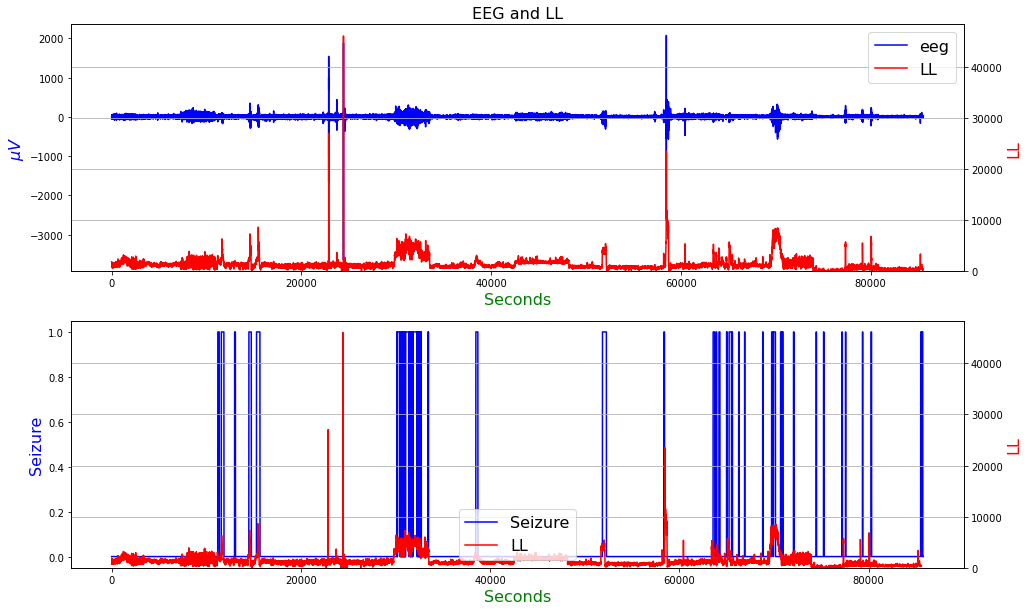

In [21]:
plot3(eeg_df['Cz-C3'], eeg_labels['Cz-C3'], LL_Feature,featuretime, "LL")

# Root Mean Squared Amplitude

In [22]:
def RMSAcalculation(N, epoch):
    RMSA = np.sqrt((1/N)*sum((epoch[i])**2 for i in range(N)))
    return RMSA

In [23]:
epochstart=0
RMSA_Feature = np.array([])
for i in range(numberofEpochs):
    Epoch= eeg_df.loc[epochstart:epochstart+NEpoch-1,'Cz-C3'].to_numpy()
    epochstart += Noverlap
    RMSA_Feature=np.append(RMSA_Feature,RMSAcalculation(NEpoch, Epoch))

In [24]:
len(RMSA_Feature)

21387

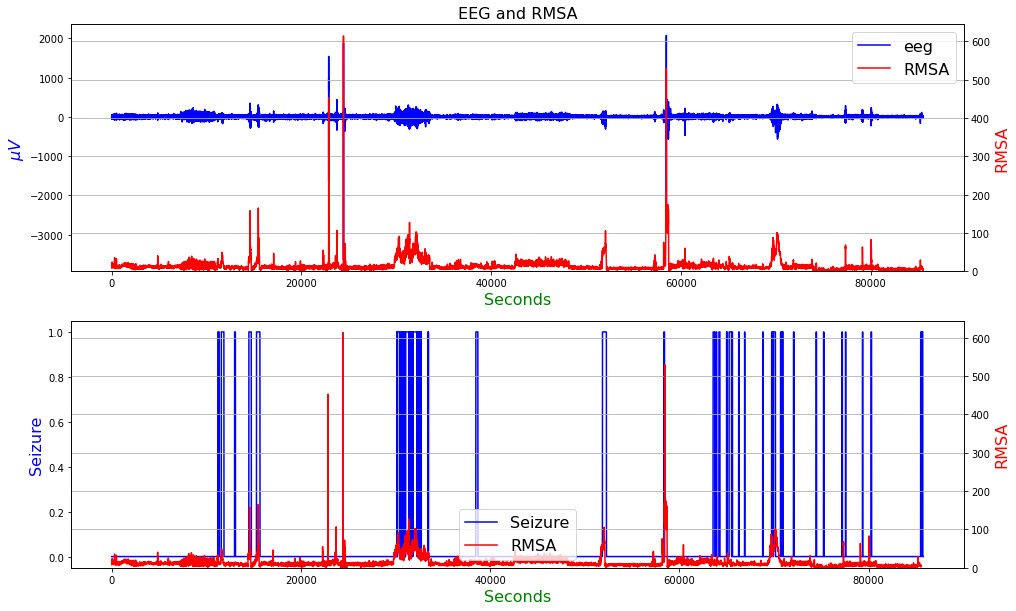

In [25]:
plot3(eeg_df['Cz-C3'], eeg_labels['Cz-C3'], RMSA_Feature,featuretime, "RMSA")

# Non Linear Energy

In [26]:
def NLEcalculation(N, epoch):
    NLE = (1/(N-2))*sum(((epoch[i+1])**2 - epoch[i]*epoch[i+2]) for i in range(N-2))
    return NLE

In [27]:
epochstart=0
NLE_Feature = np.array([])
for i in range(numberofEpochs):
    Epoch= eeg_df.loc[epochstart:epochstart+NEpoch-1,'Cz-C3'].to_numpy()
    epochstart += Noverlap
    NLE_Feature=np.append(NLE_Feature,NLEcalculation(NEpoch, Epoch))

In [28]:
len(NLE_Feature)

21387

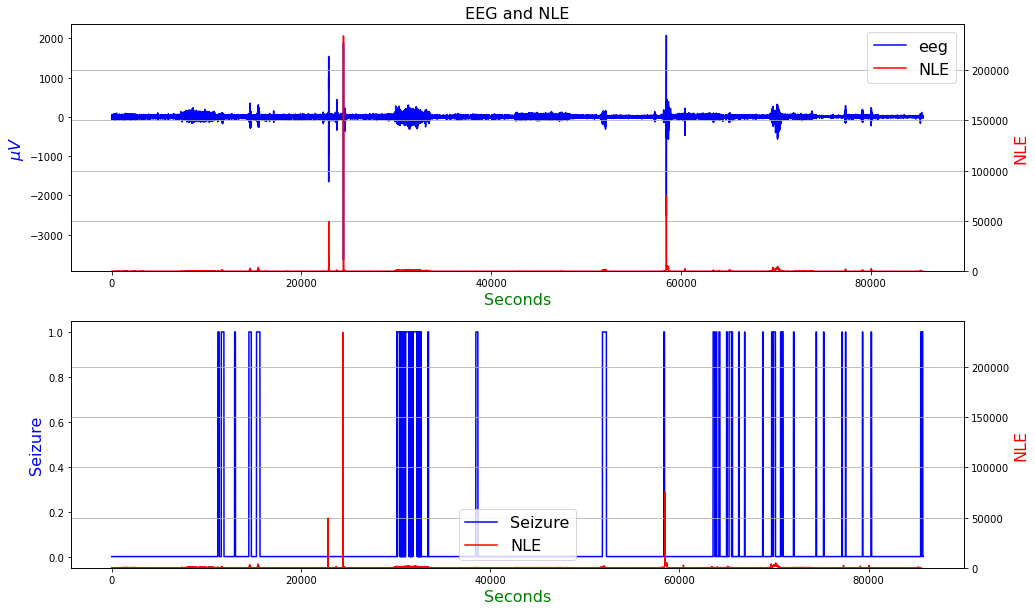

In [29]:
plot3(eeg_df['Cz-C3'], eeg_labels['Cz-C3'], NLE_Feature,featuretime, "NLE")

# 1st Hjorth Parameter: Activity

In [30]:
def Meancalculation(N, epoch):
    Mean = (1/N)*sum((epoch[i]) for i in range(N))
    return Mean

In [31]:
def Activitycalculation(N, epoch):
    Mean = Meancalculation(N, epoch)
    Activity = (1/N)*(sum(((epoch[i] - Mean)**2) for i in range(N)))
    return Activity

In [32]:
epochstart=0
Activity_Feature = np.array([])
for i in range(numberofEpochs):
    Epoch= eeg_df.loc[epochstart:epochstart+NEpoch-1,'Cz-C3'].to_numpy()
    epochstart += Noverlap
    Activity_Feature=np.append(Activity_Feature,Activitycalculation(NEpoch, Epoch))

In [33]:
len(Activity_Feature)

21387

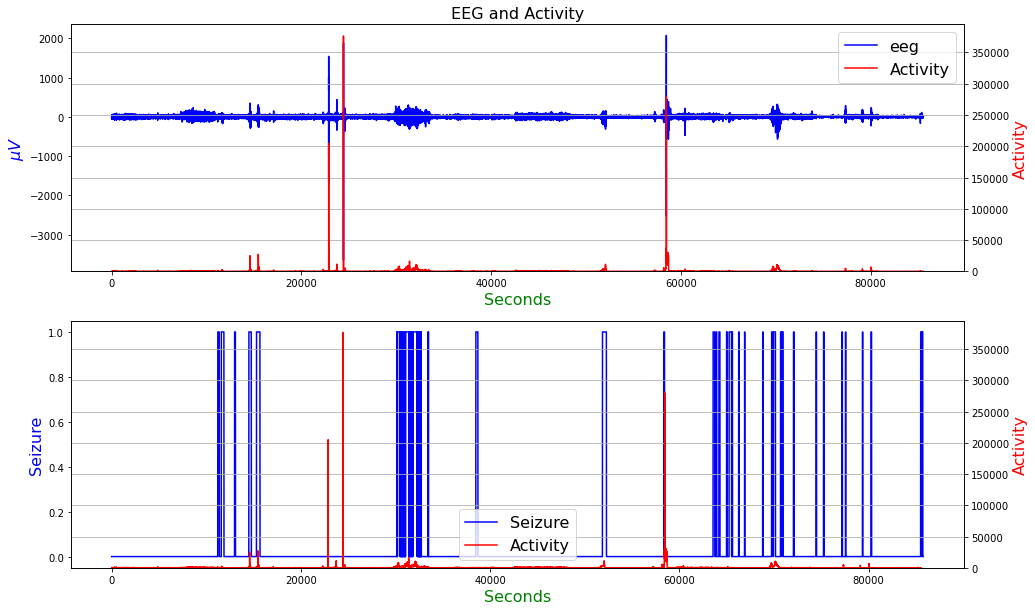

In [34]:
plot3(eeg_df['Cz-C3'], eeg_labels['Cz-C3'], Activity_Feature,featuretime, "Activity")

# 2nd Hjorth Parameter: Mobility

In [35]:
def MeanFirstDeriv(N, epoch):
    Mean = (1/(N-1))*sum((epoch[i+1]-epoch[i]) for i in range(N-1))
    return Mean

In [36]:
def VarFirstDeriv(N,epoch):
    Mean = MeanFirstDeriv(N, epoch)
    Var = (1/(N-1))*sum(((epoch[i+1]- epoch[i])- Mean)**2 for i in range(N-1))
    return Var

In [37]:
def Mobilitycalculation(N, epoch):
    Var = VarFirstDeriv(N, epoch)
    Activity = Activitycalculation(N,epoch)
    Mobility = np.sqrt(Var/Activity)
    return Mobility

In [38]:
epochstart=0
Mobility_Feature = np.array([])
for i in range(numberofEpochs):
    Epoch= eeg_df.loc[epochstart:epochstart+NEpoch-1,'Cz-C3'].to_numpy()
    epochstart += Noverlap
    Mobility_Feature=np.append(Mobility_Feature, Mobilitycalculation(NEpoch, Epoch))

In [39]:
len(Mobility_Feature)

21387

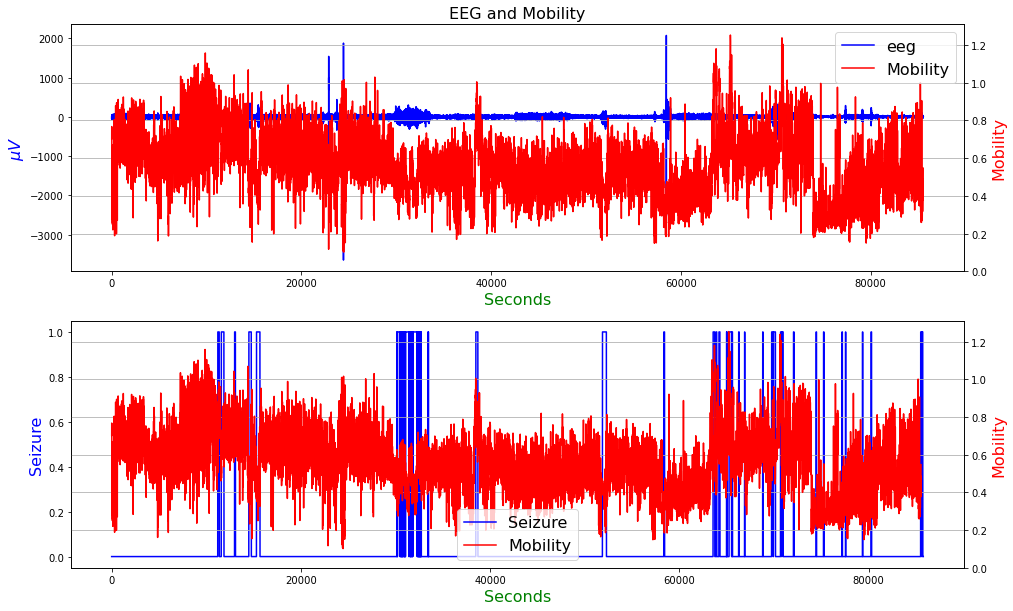

In [40]:
plot3(eeg_df['Cz-C3'], eeg_labels['Cz-C3'], Mobility_Feature,featuretime, "Mobility")

# 3rd Hjorth Parameter: Complexity

In [41]:
def MeanSecondDeriv(N, epoch):
    Mean = (1/N-2)*sum(((epoch[i+2] - epoch[i+1])-(epoch[i+1] - epoch[i])) for i in range(N-2))
    return Mean

In [42]:
def VarSecondDeriv(N,epoch):
    Mean = MeanSecondDeriv(N, epoch)
    Var = (1/(N-2))*sum((((epoch[i+2] - epoch[i+1])-(epoch[i+1] - epoch[i]))- Mean)**2 for i in range(N-2))
    return Var

In [43]:
def Complexitycalculation(N, epoch):
    Var = VarSecondDeriv(N, epoch)
    Activity = Activitycalculation(N,epoch)
    Complexity = np.sqrt(Var/Activity)
    return Complexity

In [44]:
epochstart=0
Complexity_Feature = np.array([])
for i in range(numberofEpochs):
    Epoch= eeg_df.loc[epochstart:epochstart+NEpoch-1,'Cz-C3'].to_numpy()
    epochstart += Noverlap
    Complexity_Feature=np.append(Complexity_Feature, Complexitycalculation(NEpoch, Epoch))

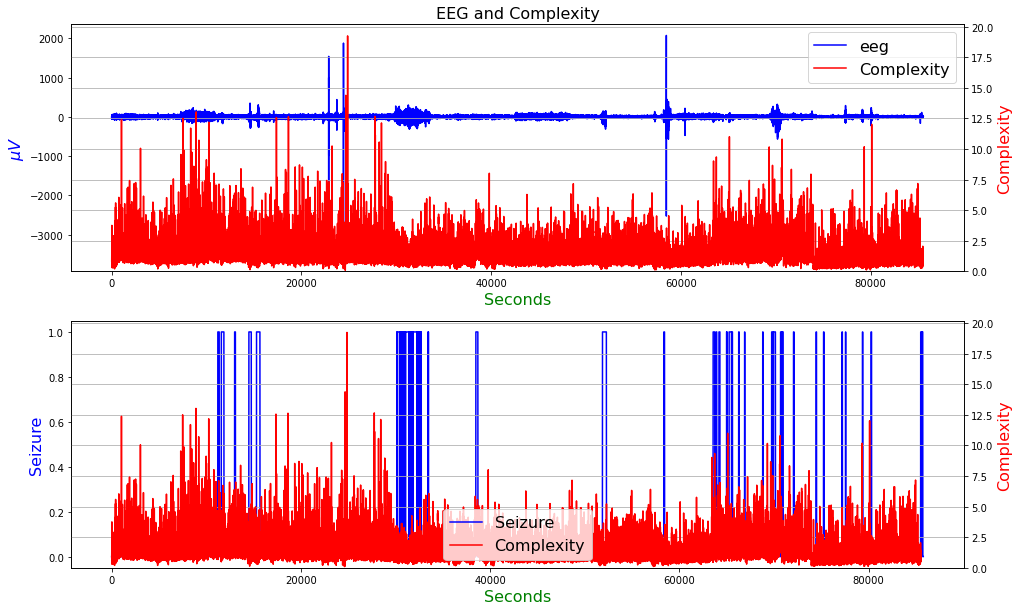

In [45]:
plot3(eeg_df['Cz-C3'], eeg_labels['Cz-C3'], Complexity_Feature,featuretime, "Complexity")

In [46]:
len(Complexity_Feature)

21387

# Intensity Weighted Mean Frequency (IWMF)

In [47]:
def fmcalculation(psd, fs, N):
    df = fs/N # fs is the sampling freaquency = 32Hz
    num = df * sum(psd[i]*i for i in range((N//2)-1))
    den = sum(psd[i] for i in range((N//2)-1))
    #print(den)
    return num/den

In [48]:
epochstart=0
FM_Feature = np.array([])
for i in range(numberofEpochs):
    Epoch= eeg_df.loc[epochstart:epochstart+NEpoch-1,'Cz-C3'].to_numpy()
    PSD = periodogram(Epoch,fs=32,window='hann',detrend=False)[1]
    epochstart += Noverlap
    FM_Feature=np.append(FM_Feature,fmcalculation(PSD, 32, NEpoch))

In [49]:
len(FM_Feature)

21387

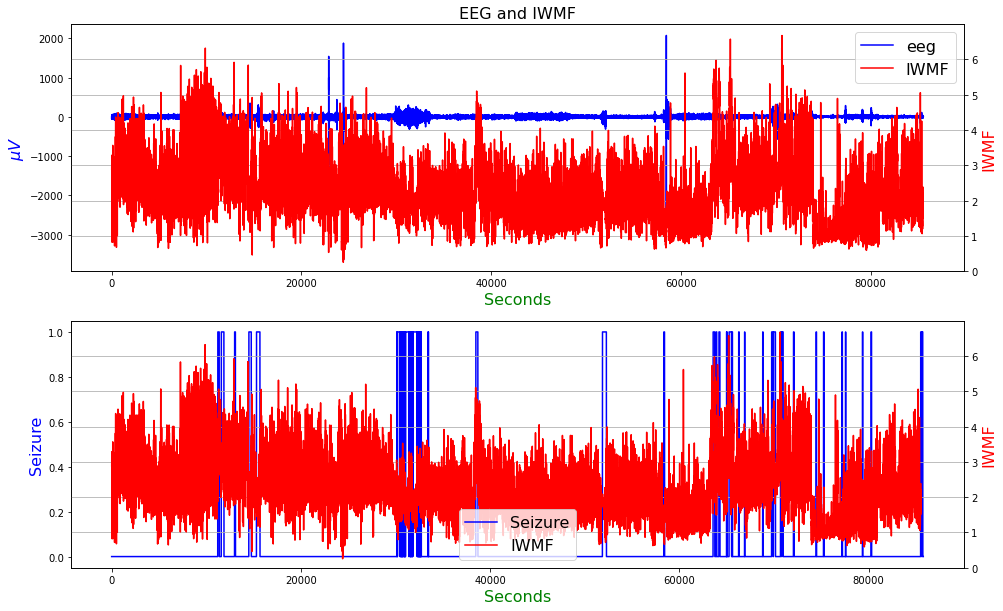

In [50]:
plot3(eeg_df['Cz-C3'], eeg_labels['Cz-C3'], FM_Feature,featuretime, "IWMF")

# Intensity Weighted Bandwidth

In [51]:
def bwcalculation(psd, fs, N):
    fm = fmcalculation(psd, fs, N)
    df = fs/N # fs is the sampling freaquency = 32Hz   
    num = sum(psd[i]*((fm - i*df)**2) for i in range((N//2)-1))
    den = sum(psd[i] for i in range((N//2)-1))
    return np.sqrt(num/den)

In [52]:
epochstart=0
BW_Feature = np.array([])
for i in range(numberofEpochs):
    Epoch= eeg_df.loc[epochstart:epochstart+NEpoch-1,'Cz-C3'].to_numpy()
    PSD = periodogram(Epoch,fs=32,window='hann',detrend=False)[1]
    epochstart += Noverlap
    BW_Feature=np.append(BW_Feature,bwcalculation(PSD, 32, NEpoch))

In [53]:
len(BW_Feature)

21387

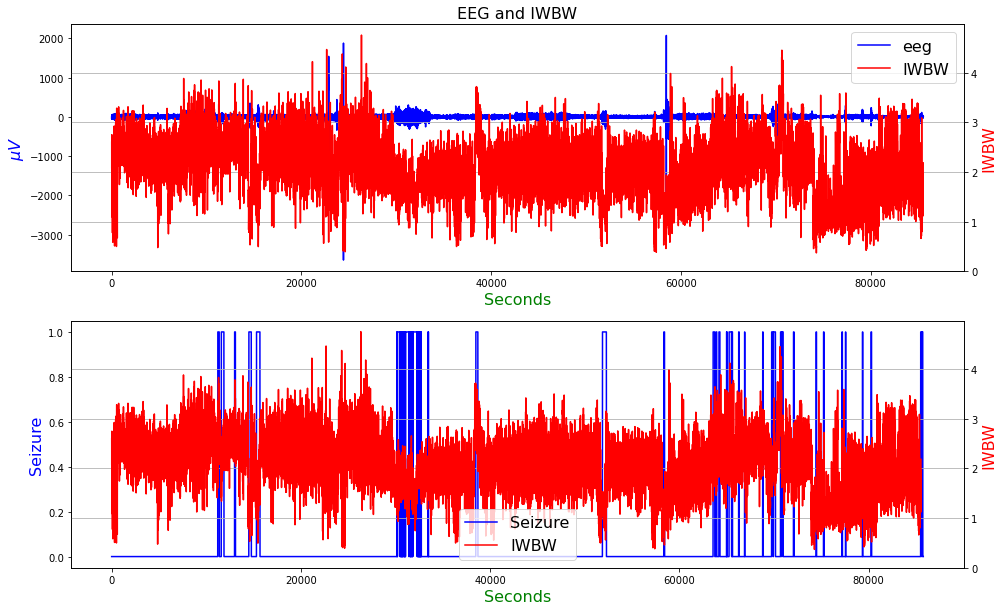

In [54]:
plot3(eeg_df['Cz-C3'], eeg_labels['Cz-C3'], BW_Feature,featuretime, "IWBW")

# Total Power

In [55]:
def tpcalculation(psd, N):
    tp = sum(psd[i] for i in range((N//2)-1))
    return tp

In [56]:
epochstart=0
TP_Feature = np.array([])
for i in range(numberofEpochs):
    Epoch= eeg_df.loc[epochstart:epochstart+NEpoch-1,'Cz-C3'].to_numpy()
    PSD = periodogram(Epoch,fs=32,window='hann',detrend=False)[1]
    epochstart += Noverlap
    TP_Feature=np.append(TP_Feature,tpcalculation(PSD,  NEpoch))

In [57]:
len(TP_Feature)

21387

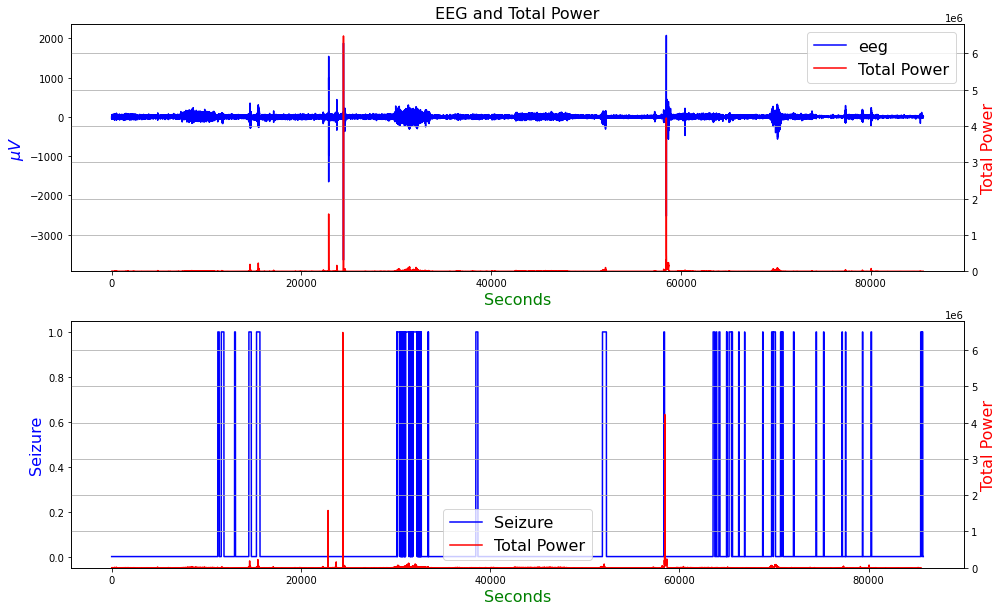

In [58]:
plot3(eeg_df['Cz-C3'], eeg_labels['Cz-C3'], TP_Feature,featuretime, "Total Power")

# Peak Frequency

In [59]:
def pfcalculation(psd, fs, N):
    k=0
    max = psd[0]
    for i in range(1,128):
        if (psd[i] > max):
            k = i
            max = psd[i]
    return k * (fs/N)

In [60]:
epochstart=0
PF_Feature = np.array([])
for i in range(numberofEpochs):
    Epoch= eeg_df.loc[epochstart:epochstart+NEpoch-1,'Cz-C3'].to_numpy()
    PSD = periodogram(Epoch,fs=32,window='hann',detrend=False)[1]
    epochstart += Noverlap
    PF_Feature=np.append(PF_Feature,pfcalculation(PSD, 32, NEpoch))

In [61]:
len(PF_Feature)

21387

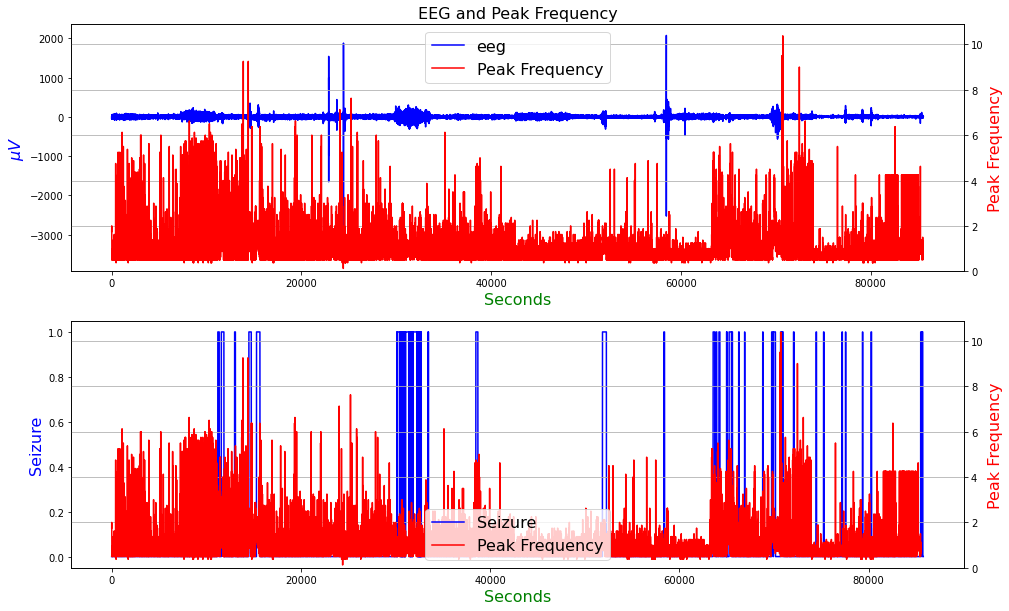

In [62]:
plot3(eeg_df['Cz-C3'], eeg_labels['Cz-C3'], PF_Feature,featuretime, "Peak Frequency")

# Spectral Edge Frequency

In [63]:
def SEF90calculation(psd, fs, N):
    tp = tpcalculation(psd, N)
    sef90 = 0
    i = 0
    while(sef90< 0.9*tp):
        sef90+= psd[i]
        i+=1
    sef90 = (i-1)*(fs/N)
    return sef90

In [64]:
epochstart=0
SEF90_Feature = np.array([])
for i in range(numberofEpochs):
    Epoch= eeg_df.loc[epochstart:epochstart+NEpoch-1,'Cz-C3'].to_numpy()
    PSD = periodogram(Epoch,fs=32,window='hann',detrend=False)[1]
    epochstart += Noverlap
    SEF90_Feature=np.append(SEF90_Feature,SEF90calculation(PSD, 32, NEpoch))

In [65]:
len(SEF90_Feature)

21387

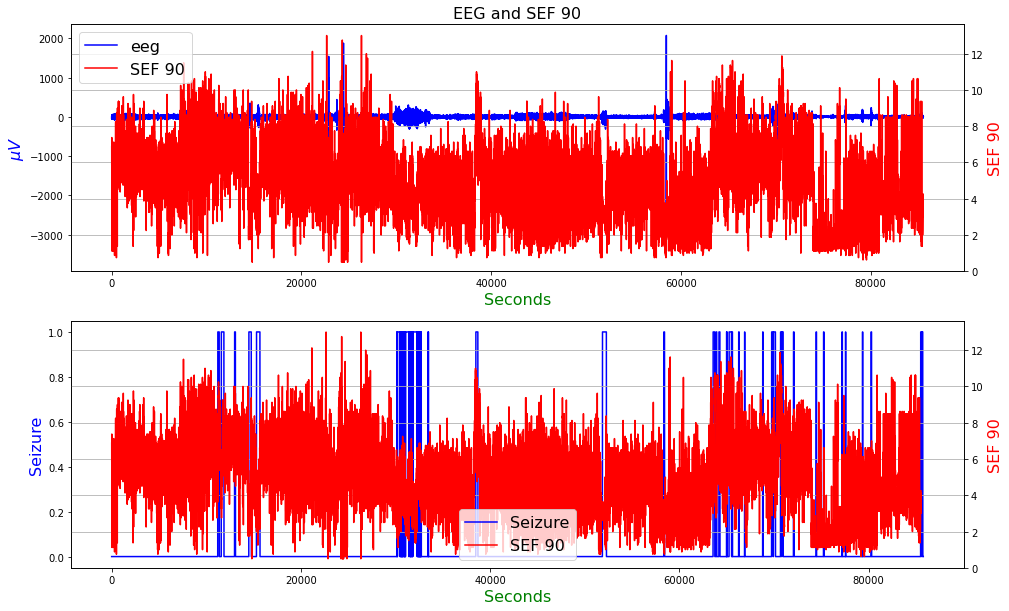

In [66]:
plot3(eeg_df['Cz-C3'], eeg_labels['Cz-C3'], SEF90_Feature,featuretime, "SEF 90")

# Model Creation

In [166]:
features = np.column_stack((LL_Feature, RMSA_Feature,NLE_Feature,
                            Activity_Feature, Mobility_Feature, Complexity_Feature,
                            FM_Feature,BW_Feature, TP_Feature, PF_Feature, SEF90_Feature))

In [167]:
np.shape(features)

(21387, 11)

In [168]:
CzC3_labels = eeg_labels.loc[:,'Cz-C3'][featuretime].to_numpy()

In [169]:
len(CzC3_labels)

21387

In [170]:
X_train, X_test, y_train, y_test = train_test_split(features, CzC3_labels, test_size=0.1, random_state=1) 


In [171]:
np.shape(X_train), np.shape(X_test), len(y_train), len(y_test)

((19248, 11), (2139, 11), 19248, 2139)

In [172]:
len(np.where(y_train ==0)[0]), len(np.where(y_train ==1)[0])

(17990, 1258)

Clearly there is a class imbalance in the training data. The vast majority of the epochs are in the non seizure class. This could lead to a biased model.
Perform undersampling to make both classes have equal samples

In [176]:
from imblearn.under_sampling import RandomUnderSampler

# Create the undersampler object
undersampler = RandomUnderSampler(random_state=42)

# Fit and transform the training data
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

In [177]:
len(X_train_resampled), len(y_train_resampled)

(2516, 2516)

In [178]:
len(np.where(y_train_resampled ==0)[0]), len(np.where(y_train_resampled ==1)[0])

(1258, 1258)

# Decision Tree on Resampled Data

In [77]:
param_grid = {
    'max_depth': range(1,10)   
}

dt = DecisionTreeClassifier()

# Use grid search cross-validation to find the best hyperparameters
grid_search = GridSearchCV(dt,param_grid, cv=5)
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best hyperparameters and the corresponding accuracy
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy: {:.2f}".format(grid_search.best_score_))

Best hyperparameters:  {'max_depth': 3}
Best accuracy: 0.79


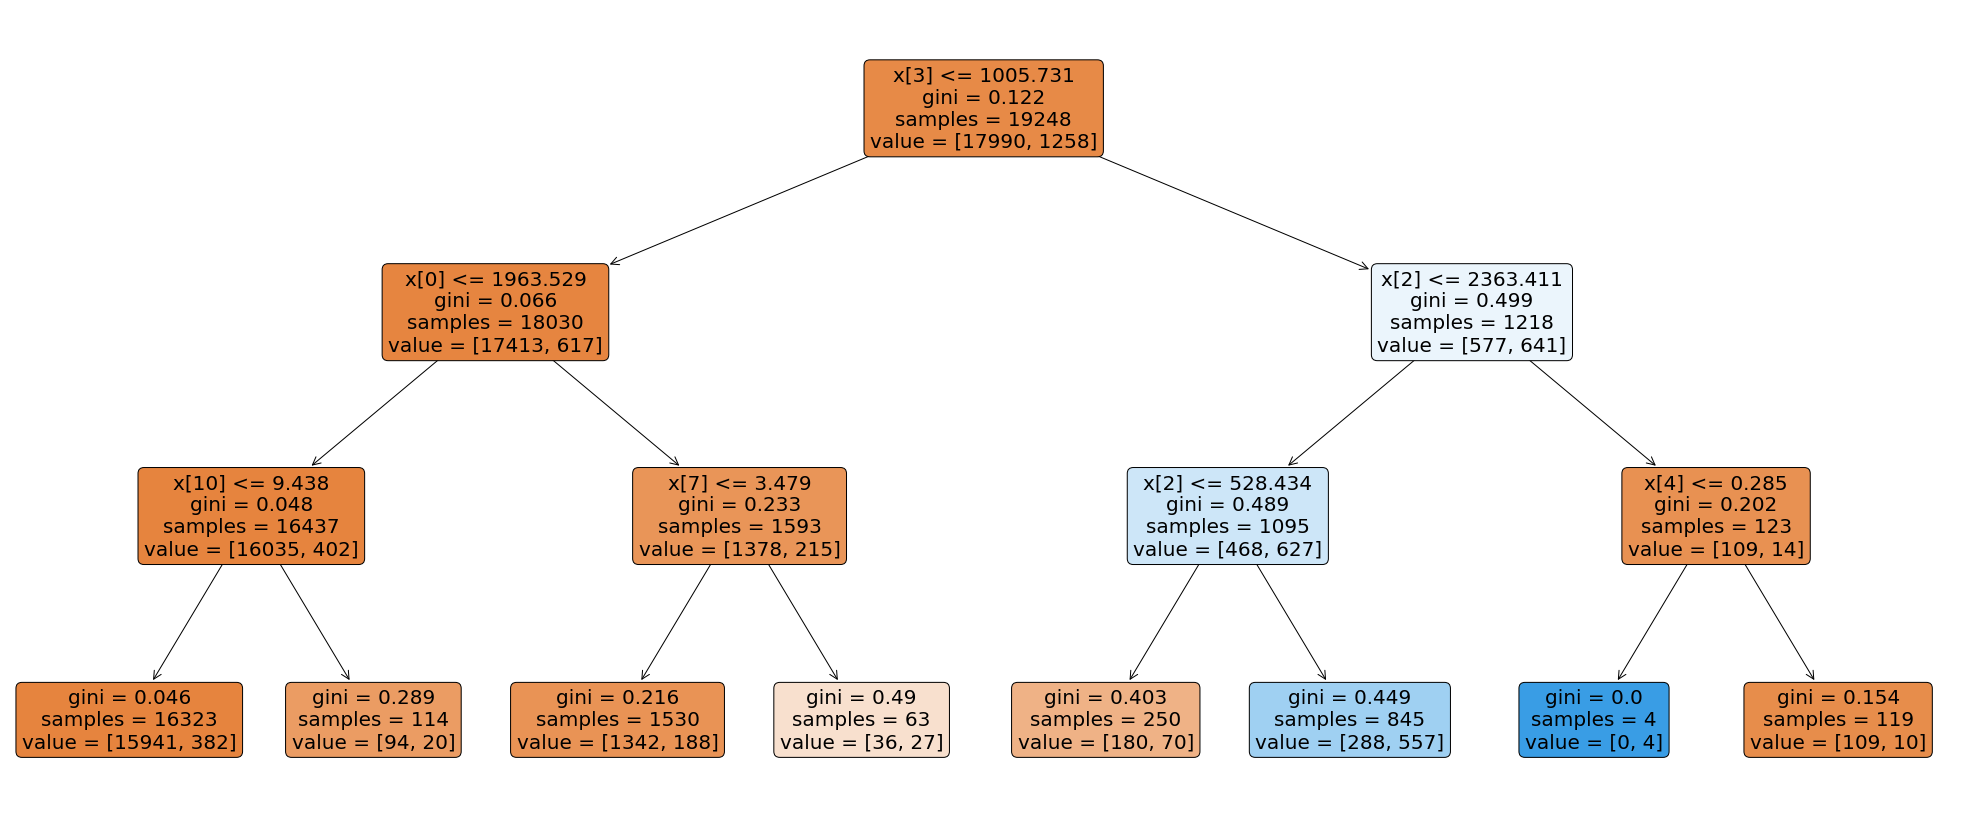

In [78]:
# Fit decision tree with optimal hyperparameters
dt1_best = DecisionTreeClassifier(max_depth=grid_search.best_params_['max_depth'])
dt1_best.fit(X_train, y_train)
# Plot the decision tree
plt.figure(figsize=(35, 15))
plot_tree(dt1_best, filled=True, rounded=True, fontsize=20)
plt.show()

In [79]:
def ConfusionMatrixMetrics(y_test, pred):
    table = confusion_matrix(y_true = y_test,y_pred = pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=table)
    disp.plot()
    
    # Extract values from the confusion matrix
    tn, fp, fn, tp = table.ravel()

    # Calculate metrics
    accuracy = (tp+tn)/(tn+fp+fn+tp)
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = tp/(tp+fp)
    f1 = 2 * (precision * sensitivity) / (precision + sensitivity)

    print("Accuracy: {:.4f}".format(accuracy))
    print("Sensitivity: {:.4f}".format(sensitivity))
    print("Specificity: {:.4f}".format(specificity))
    print("Precision: {:.4f}".format(precision))
    print("F1 score: {:.4f}".format(f1))

In [80]:
dt1_pred = dt1_best.predict(X_test )

Accuracy: 0.9481
Sensitivity: 0.4416
Specificity: 0.9874
Precision: 0.7312
F1 score: 0.5506


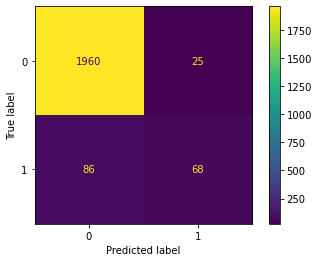

In [81]:
ConfusionMatrixMetrics(y_test, dt1_pred)

In [82]:
#Define function to plot ROC curve
def PlotRocCurve(y_test, pred_prob):
    # calculate fpr, tpr, thresholds and auc
    fpr, tpr, thresholds = roc_curve(y_test, pred_prob[:,1])
    roc_auc = auc(fpr, tpr)

    # plot ROC curve
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()  

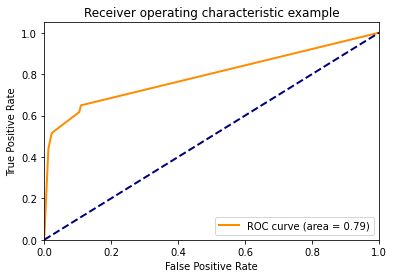

In [83]:
dt1_pred_prob = dt1_best.predict_proba(X_test)
PlotRocCurve(y_test, dt1_pred_prob)

# RF on Resampled data

In [84]:
param_grid = {
    'n_estimators': [10,50,100],
    'max_depth': range(1,8) 
}

rf = RandomForestClassifier()

# Use grid search cross-validation to find the best hyperparameters
grid_search_2 = GridSearchCV(rf,param_grid, cv=5)
grid_search_2.fit(X_train_resampled, y_train_resampled)

# Print the best hyperparameters and the corresponding accuracy
print("Best hyperparameters: ", grid_search_2.best_params_)
print("Best accuracy: {:.2f}".format(grid_search_2.best_score_))

Best hyperparameters:  {'max_depth': 6, 'n_estimators': 100}
Best accuracy: 0.80


In [85]:
# Initialize a new instance of RandomForestClassifier with the best hyperparameters
best_n_estimators = grid_search_2.best_params_['n_estimators']
best_max_depth = grid_search_2.best_params_['max_depth']
rf1_best = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth)

# Fit the model on the training data
rf1_best.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(max_depth=6)

Accuracy: 0.8362
Sensitivity: 0.7568
Specificity: 0.9157
Precision: 0.8998
F1 score: 0.8221


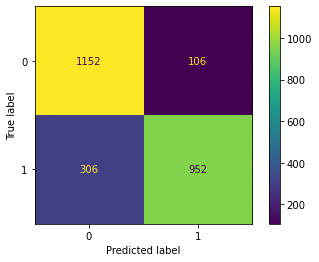

In [86]:
pred_test = rf1_best.predict(X_train_resampled)
ConfusionMatrixMetrics(y_train_resampled, pred_test)

In [87]:
rf1_pred = rf1_best.predict(X_test )

Accuracy: 0.8747
Sensitivity: 0.6883
Specificity: 0.8892
Precision: 0.3252
F1 score: 0.4417


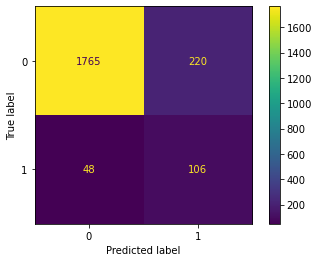

In [88]:
ConfusionMatrixMetrics(y_test, rf1_pred)

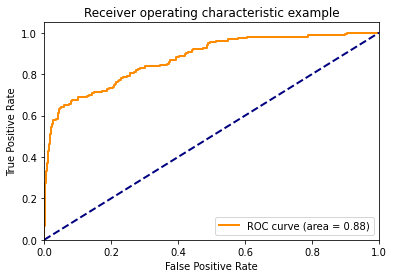

In [89]:
rf1_pred_prob = rf1_best.predict_proba(X_test)
PlotRocCurve(y_test,rf1_pred_prob)

In [90]:
#Make feature importance plotter:
def PlotFeatureImportance(feature_importance, feature_names):
    # Sort feature importance values in descending order
    sorted_idx = feature_importance.argsort()

    # Reorder feature names according to sorted feature importance values
    sorted_feature_names = [feature_names[i] for i in sorted_idx]

    # Set color palette
    colors = sns.color_palette("viridis", len(feature_importance))

    # Create horizontal bar plot of feature importances
    fig, ax = plt.subplots(figsize=(10,8))
    ax.barh(range(len(feature_importance)), feature_importance[sorted_idx], color=colors)
    ax.set_yticks(range(len(feature_importance)))
    ax.set_yticklabels(sorted_feature_names)
    ax.set_xlabel('Feature Importance')
    ax.set_ylabel('Feature Name')
    ax.set_title('Feature Importance')
    plt.show()

In [184]:
#Find feature importance
rf1_feature_importance = rf1_best.feature_importances_
# Define feature names
feature_names = ['Line Length', 'RMSA', 'Non Linear Energy', 
                 'Activity', 'Mobility', 'Complexity', 
                 'IWMF', 'IWBW', 'Total Power', 'Peak Frequency', 'SEF 90']

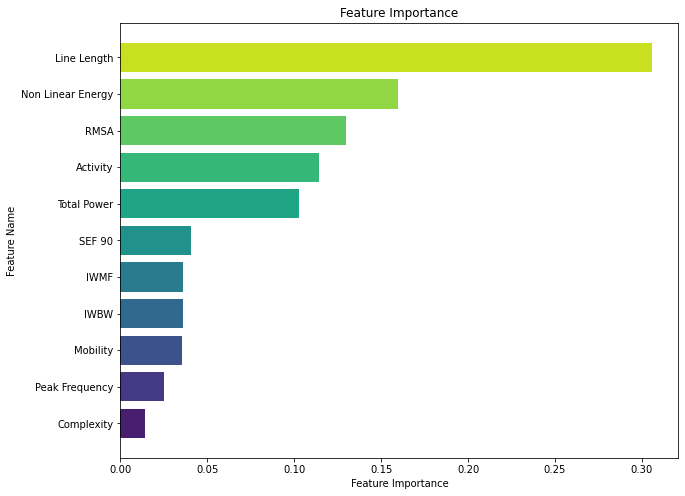

In [92]:
PlotFeatureImportance(rf1_feature_importance, feature_names)

In [150]:
from keras.models import Sequential
from keras.layers import Dense

# Define the neural network model
model = Sequential()
model.add(Dense(128, input_dim=X_train_resampled.shape[1], activation='relu'))
model.add(Dense(64,  activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model on the resampled training data
model.fit(X_train_resampled, y_train_resampled, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test set accuracy: {:.2f}".format(accuracy))


Epoch 1/50
79/79 [==============================] - 1s 3ms/step - loss: 35.8236 - accuracy: 0.6248 - val_loss: 51.6443 - val_accuracy: 0.1856
Epoch 2/50
79/79 [==============================] - 0s 1ms/step - loss: 32.4395 - accuracy: 0.5998 - val_loss: 161.9396 - val_accuracy: 0.0725
Epoch 3/50
79/79 [==============================] - 0s 1ms/step - loss: 62.7461 - accuracy: 0.6208 - val_loss: 32.3850 - val_accuracy: 0.1898
Epoch 4/50
79/79 [==============================] - 0s 1ms/step - loss: 19.7593 - accuracy: 0.6276 - val_loss: 47.6824 - val_accuracy: 0.6844
Epoch 5/50
79/79 [==============================] - 0s 1ms/step - loss: 22.3473 - accuracy: 0.6296 - val_loss: 2.6674 - val_accuracy: 0.9275
Epoch 6/50
79/79 [==============================] - 0s 1ms/step - loss: 25.9306 - accuracy: 0.6383 - val_loss: 4.0913 - val_accuracy: 0.5026
Epoch 7/50
79/79 [==============================] - 0s 1ms/step - loss: 23.7212 - accuracy: 0.6236 - val_loss: 8.7004 - val_accuracy: 0.8836
Epoch 8/

In [151]:
# Predict on the test set
y_pred = model.predict(X_test)

# Convert predicted probabilities to class labels
y_pred_classes = (y_pred > 0.5).astype(int)

67/67 [==============================] - 0s 535us/step


Accuracy: 0.8668
Sensitivity: 0.6883
Specificity: 0.8806
Precision: 0.3090
F1 score: 0.4266


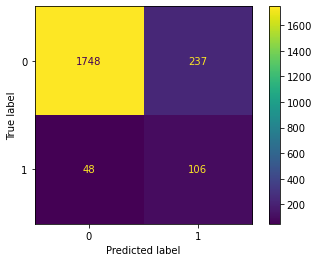

In [152]:
ConfusionMatrixMetrics(y_test, y_pred_classes)

# Rebuild RF model with most importance features

In [93]:
important_features = np.column_stack((LL_Feature,RMSA_Feature ,Activity_Feature,NLE_Feature,TP_Feature))
important_feature_names = ['Line Length', 'RMSA', 'Activity','Non Linear Energy','Total Power']
np.shape(important_features)

(21387, 5)

In [94]:
X_train, X_test, y_train, y_test = train_test_split(important_features, CzC3_labels, test_size=0.1, random_state=1) 


In [95]:
np.shape(X_train)

(19248, 5)

In [96]:
# Fit and transform the training data
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Create the undersampler object
undersampler = RandomUnderSampler(random_state=42)

# Fit and transform the training data
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Shuffle the indices
indices = np.arange(len(X_train_resampled))
np.random.shuffle(indices)

len(X_train_resampled), len(y_train_resampled), np.shape(X_train_resampled)

(2516, 2516, (2516, 5))

In [97]:
y_train_resampled

array([0., 0., 0., ..., 1., 1., 1.])

# RF on Resampled data with Important Predictors

In [98]:
param_grid = {
    'n_estimators': [10,50,100],
    'max_depth': range(1,8)
}

rf = RandomForestClassifier()

# Use grid search cross-validation to find the best hyperparameters
grid_search_2 = GridSearchCV(rf,param_grid, cv=5)
grid_search_2.fit(X_train_resampled, y_train_resampled)

# Print the best hyperparameters and the corresponding accuracy
print("Best hyperparameters: ", grid_search_2.best_params_)
print("Best accuracy: {:.2f}".format(grid_search_2.best_score_))

Best hyperparameters:  {'max_depth': 7, 'n_estimators': 50}
Best accuracy: 0.79


In [99]:
# Initialize a new instance of RandomForestClassifier with the best hyperparameters
best_n_estimators = grid_search_2.best_params_['n_estimators']
best_max_depth = grid_search_2.best_params_['max_depth']
rf2_best = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth)

# Fit the model on the training data
rf2_best.fit(X_train_resampled, y_train_resampled)

# Evaluate the model on the test set
accuracy = rf2_best.score(X_test, y_test)
print("Test set accuracy: {:.2f}".format(accuracy))

Test set accuracy: 0.86


Accuracy: 0.8355
Sensitivity: 0.7599
Specificity: 0.9110
Precision: 0.8951
F1 score: 0.8220


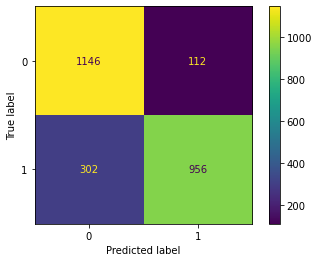

In [100]:
rf2_pred_test = rf2_best.predict(X_train_resampled)
ConfusionMatrixMetrics(y_train_resampled,rf2_pred_test)

Accuracy: 0.8583
Sensitivity: 0.6753
Specificity: 0.8725
Precision: 0.2913
F1 score: 0.4070


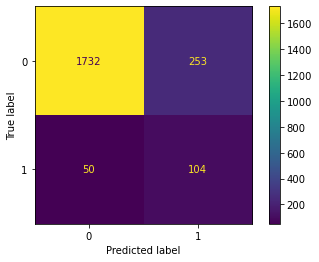

In [101]:
rf2_pred = rf2_best.predict(X_test )

ConfusionMatrixMetrics(y_test, rf2_pred)

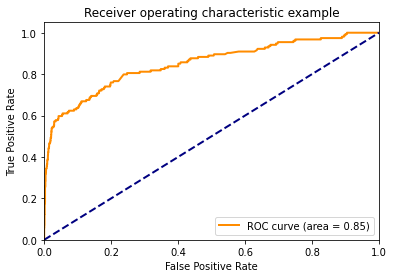

In [102]:
rf2_pred_prob = rf2_best.predict_proba(X_test)
PlotRocCurve(y_test,rf2_pred_prob)

In [103]:
#Find feature importance
rf2_feature_importance = rf2_best.feature_importances_
rf2_feature_importance

array([0.32869749, 0.18580026, 0.14889308, 0.2851417 , 0.05146748])

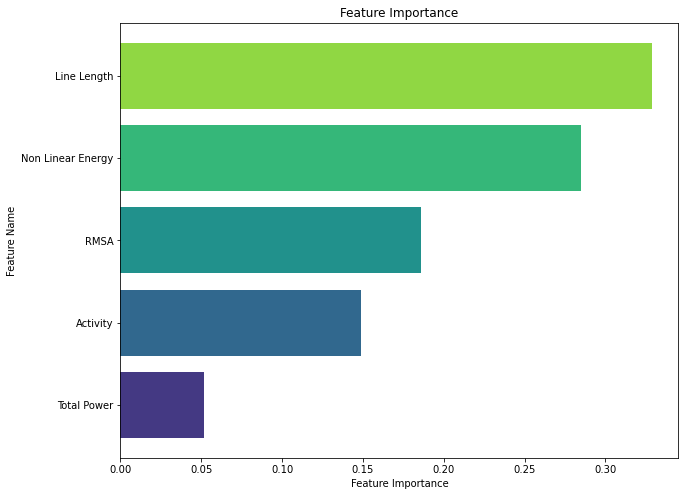

In [104]:
PlotFeatureImportance(rf2_feature_importance, important_feature_names)

#

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Define the neural network model
model = Sequential()
model.add(Dense(128, input_dim=X_train_resampled.shape[1], activation='relu'))
model.add(Dense(64,  activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model on the resampled training data
model.fit(X_train_resampled, y_train_resampled, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test set accuracy: {:.2f}".format(accuracy))


In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)

# Convert predicted probabilities to class labels
y_pred_classes = (y_pred > 0.5).astype(int)

Accuracy: 0.9345
Sensitivity: 0.5000
Specificity: 0.9683
Precision: 0.5500
F1 score: 0.5238


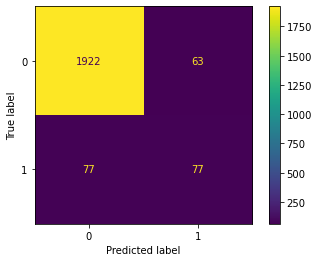

In [139]:
ConfusionMatrixMetrics(y_test, y_pred_classes)

In [122]:
#Define function to plot ROC curve
def PlotRocCurve(y_test, pred_prob):
    # calculate fpr, tpr, thresholds and auc
    fpr, tpr, thresholds = roc_curve(y_test, pred_prob)
    roc_auc = auc(fpr, tpr)

    # plot ROC curve
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()  

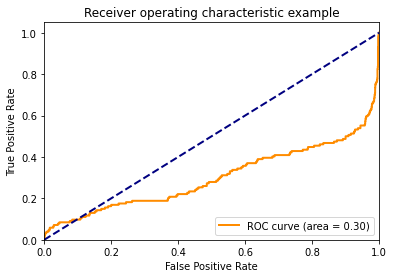

In [123]:
PlotRocCurve(y_test,dense_pred)

In [156]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state = 0) #Initialise the model

In [157]:
log_reg.fit(X_train_resampled,y_train_resampled)

LogisticRegression(random_state=0)

In [163]:
log_reg.fit(X_train_resampled,y_train_resampled)

LogisticRegression(random_state=0)

In [164]:
y_pred_reg = log_reg.predict(X_test)

Accuracy: 0.8046
Sensitivity: 0.6364
Specificity: 0.8176
Precision: 0.2130
F1 score: 0.3192


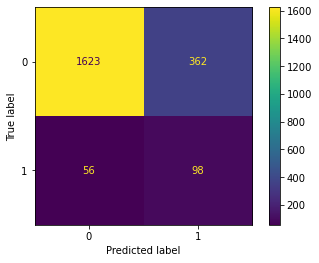

In [165]:
ConfusionMatrixMetrics(y_test, y_pred_reg)